# Fitting a Hologram

This notebook shows how to load a pre-recorded hologram of a colloidal sphere
into a Feature object and analyze it with Lorenz-Mie theory. The analysis yields
the radius of the sphere, the refractive index of the sphere, and the sphere's
three-dimensional location relative to the center of the imaging plane.

In [1]:
%matplotlib inline
import matplotlib
backend = matplotlib.get_backend()

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import cv2

from pylorenzmie.utilities import configuration as config
config.use_catch = True
from pylorenzmie.analysis import Frame

matplotlib.use(backend)

## Framework for Lorenz-Mie analysis
First, we instantiate a Frame() object. By default, Frame analyzes features with 
the standard Lorenz-Mie model for hologram formation. The model includes a description of the holographic microscope that records the images we wish to analyze. In this example, we specify that the instrument illuminates the sample with blue light at a vacuum wavelength of $\lambda$ = 0.447 μm and has a system magnification of 0.048 μm/pixel. For particles dispersed in water, the refractive index of the medium is $n_m$ = 1.340 at the imaging wavelength. These calibration constants may differ for different hardware implementations.
The commercial xSight instrument, for example, uses a system magnification of 0.120 μm/pixel.

In [2]:
configuration = dict(wavelength = 0.447,    # [um]
                     magnification = 0.048, # [um/pixel]
                     n_m = 1.34, 
                     distribution = 'radial',
                     percentpix = 0.2)

frame = Frame(**configuration)

Adding autoShape... 


## Read in holographic microscopy data
Next, we load the (normalized) hologram we wish to fit. In the present example, we use OpenCV to load a pre-recorded hologram that was saved as a PNG image. We convert the image to grayscale and normalize it by the mean value. This hologram was cropped from a larger image. Since we are not interested in locating the particle within the original image, we provide the model with a standard coordinate system using the coordinates() helper function. We finally can provide the normalized image data to the Feature() object for analysis.

In [3]:
def report(frame, results):
    fig, ax = plt.subplots(figsize=(8,8))
    ax.imshow(frame.data, cmap='gray')
    ax.scatter(results.x_p, results.y_p, c='r')
    for bbox in frame.bboxes:
        ax.add_patch(Rectangle(*bbox, fill=False, ec='r'))
    print(results)

In [4]:
img = cv2.imread('tutorials/image0400.png', 0).astype(float)
img /= np.mean(img)

## Load the recorded image into the Frame

In [5]:
results = frame.analyze(img)

          x_p       dx_p         y_p      dy_p         z_p       dz_p  \
0  582.570159   0.032290  685.799658  0.034873  210.830655   0.180469   
1  883.790225   0.049809  747.647796  0.046908  167.260938   0.225505   
2  762.161367  10.918574  396.572004  9.803670  151.512886  31.786353   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  1.157570  0.001824  1.393050  0.000280     True  27899  3.728226  
1  0.928175  0.002489  1.382589  0.000364     True  30574  3.696197  
2  0.423451  0.457968  1.340370  0.001023     True  71865  1.827291  


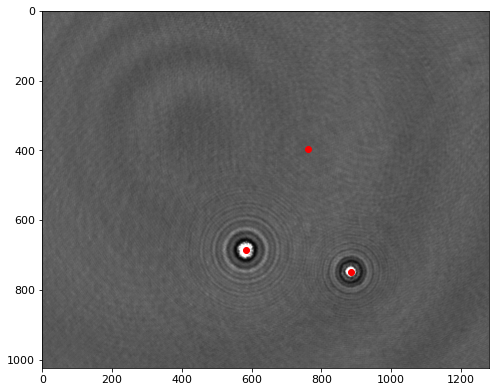

In [6]:
report(frame, results)

## Now that it's all set up, run it again

           x_p       dx_p         y_p       dy_p         z_p       dz_p  \
0   562.213691   0.042653  720.558208   0.039422  172.989837   0.152967   
1   920.214833   0.044376  732.501065   0.041700  173.604902   0.159816   
2   752.604763  13.243597  396.594377  11.971501  154.131736  40.088574   
3  1105.273039   2.403280  201.436090   2.071996  136.363162   5.767528   

        a_p      da_p       n_p      dn_p  success   npix    redchi  
0  2.101133  0.001639  1.370326  0.000088     True  58861  6.741306  
1  2.061603  0.001668  1.369529  0.000085     True  60169  6.662614  
2  0.456931  0.555893  1.340343  0.001075     True  70092  2.818954  
3  0.243457  0.137000  1.336554  0.004562     True  27829  1.611659  


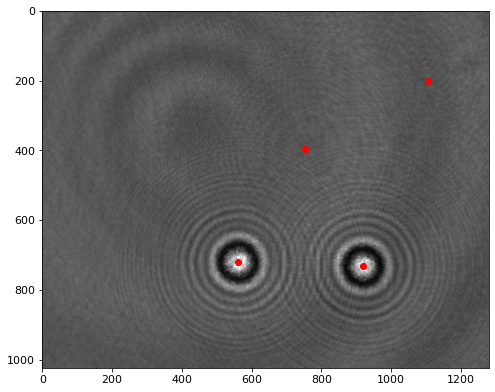

In [7]:
img = cv2.imread('tutorials/image0010.png', 0).astype(float)
img /= np.mean(img)
results = frame.analyze(img)
report(frame, results)